# Pymaceuticals Inc.
---

### Analysis

- The clinical study data shows that the tumors only decreased in size when taking one of two drug regimens, Ramicane and Capomulin. 
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats 

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata, how='left', on='Mouse ID')

# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
mouse_count = combined_data['Mouse ID'].nunique()
mouse_count

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_data = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()

duplicate_data

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID.
duplicates = combined_data.loc[combined_data['Mouse ID'] == 'g989']
duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data[combined_data['Mouse ID'].isin(duplicate_data)==False]
clean_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count = clean_data['Mouse ID'].nunique()
clean_mouse_count

248

## Summary Statistics

In [8]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1880 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1880 non-null   object 
 1   Timepoint           1880 non-null   int64  
 2   Tumor Volume (mm3)  1880 non-null   float64
 3   Metastatic Sites    1880 non-null   int64  
 4   Drug Regimen        1880 non-null   object 
 5   Sex                 1880 non-null   object 
 6   Age_months          1880 non-null   int64  
 7   Weight (g)          1880 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 132.2+ KB


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
grouped_data = clean_data.groupby("Drug Regimen")

# mean, median, variance, standard deviation, and SEM of the tumor volume.
mean_tumor_volume = grouped_data["Tumor Volume (mm3)"].mean()
median_tumor_volume = grouped_data["Tumor Volume (mm3)"].median()
variance_tumor_volume = grouped_data["Tumor Volume (mm3)"].var()
std_deviation_tumor_volume = grouped_data["Tumor Volume (mm3)"].std()
sem_tumor_volume = grouped_data["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_stats = pd.DataFrame({
    "Mean Tumor Volume": mean_tumor_volume,
    "Median Tumor Volume": median_tumor_volume,
    "Variance Tumor Volume": variance_tumor_volume,
    "Std Deviation Tumor Volume": std_deviation_tumor_volume,
    "SEM Tumor Volume": sem_tumor_volume
})

summary_stats


,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Std Deviation Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
adv_summary_stats = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
adv_summary_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

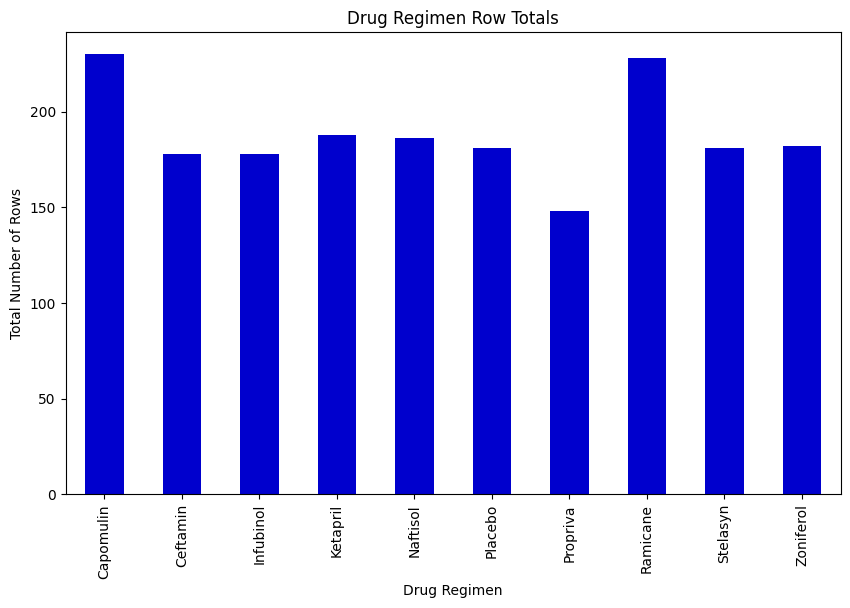

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
pd_drug_regimen_count = clean_data.groupby('Drug Regimen').size()

# Bar Chart using Pandas
pd_drug_regimen_count.plot(kind="bar", figsize=(10,6), color='mediumblue')

# Set title and lables
plt.title("Drug Regimen Row Totals")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Rows")

# Show the plot
plt.show()

In [12]:
pd_drug_regimen_count.head(10)

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
dtype: int64

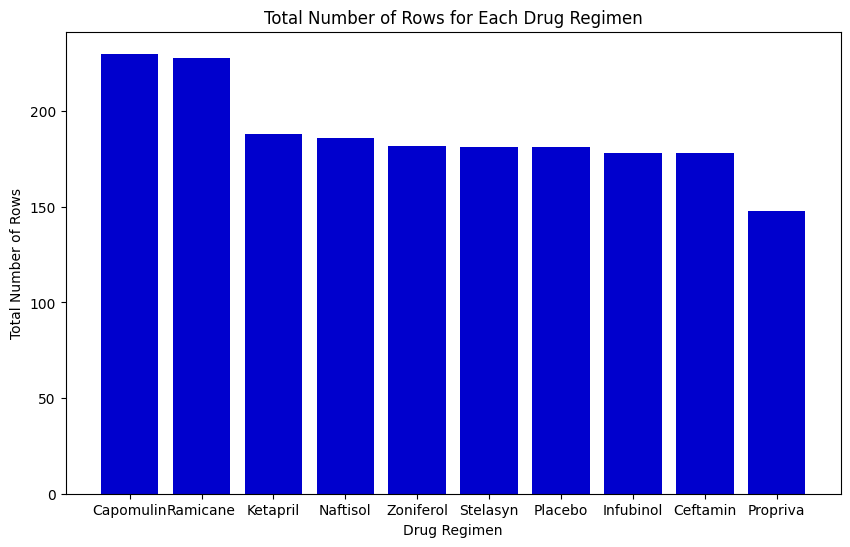

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Calculate rows for each drug regimen
py_drug_regimen_count = clean_data['Drug Regimen'].value_counts()

# Create bar chart using pyplot
plt.figure(figsize=(10,6))
plt.bar(py_drug_regimen_count.index, py_drug_regimen_count.values, color='mediumblue')
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Rows")
plt.title("Total Number of Rows for Each Drug Regimen")

# show the plot
plt.show()

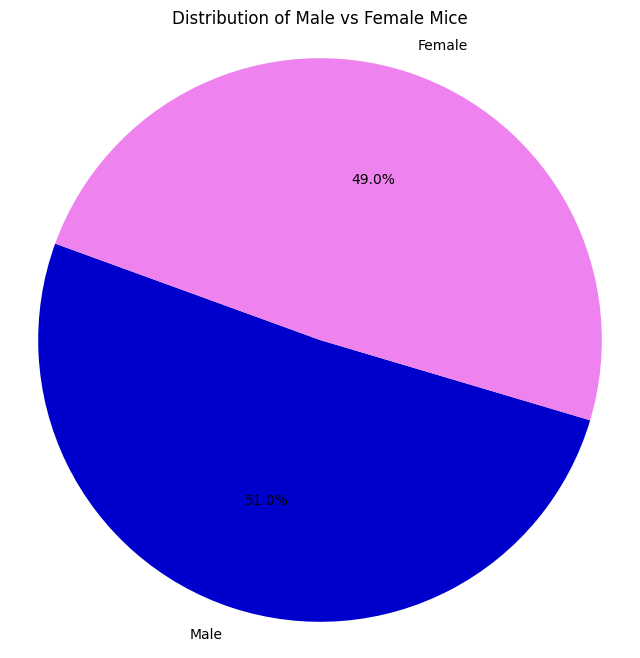

In [14]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
pd_gender_distribution = clean_data["Sex"].value_counts()

# Make the pie chart
plt.figure(figsize=(8,8))
pd_gender_distribution.plot(kind="pie", autopct="%1.1f%%", colors=["mediumblue", "violet"], startangle=160)
plt.title("Distribution of Male vs Female Mice")

# Remove the y-lable
plt.ylabel("")

# Plot shown as circle
plt.axis("equal")
plt.show()


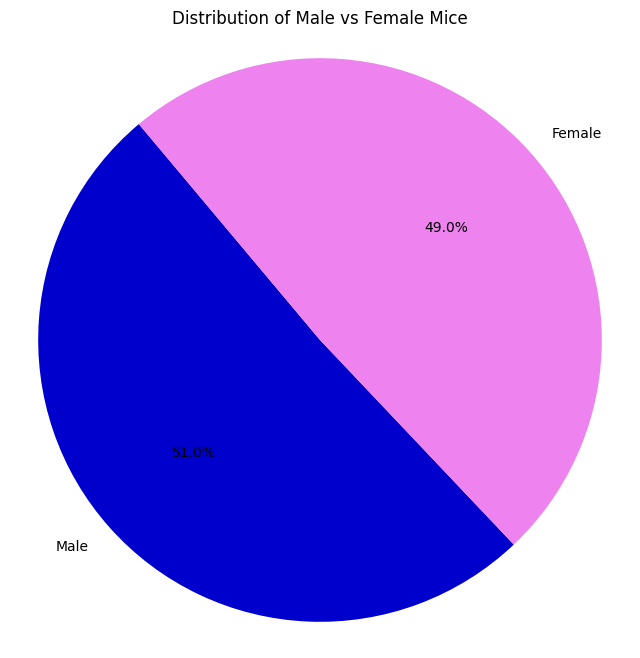

In [15]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
py_gender_distribution = clean_data["Sex"].value_counts()

# Make the pie chart
plt.figure(figsize=(8,8))
plt.pie(py_gender_distribution, labels=py_gender_distribution.index, autopct="%1.1f%%", colors=["mediumblue", "violet"], startangle=130)
plt.title("Distribution of Male vs Female Mice")

# Remove the y-lable
plt.ylabel("")

# Plot shown as circle
plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
grouped_data = clean_data.groupby('Mouse ID')["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = pd.merge(grouped_data, clean_data, on=['Mouse ID', "Timepoint"], how="inner")


In [17]:
# Put treatments into a list for for loop (and later for plot labels)
treatement_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
final_tumor_vol = []

# Locate the rows which contain mice on each drug and get the tumor volumes
for regimen in treatement_regimens:
    tumor_volumes = merged_data.loc[merged_data["Drug Regimen"] == regimen, "Tumor Volume (mm3)"]
    final_tumor_vol.append(tumor_volumes)

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for i in range(len(treatement_regimens)):
    quartiles = final_tumor_vol[i].quantile([0.25, 0.5, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    lower_bound = lower_q - (1.5 * iqr)
    upper_bound = upper_q + (1.5 * iqr)

    # Determine outliers using upper and lower bounds
    outliers = final_tumor_vol[i].loc[(final_tumor_vol[i] < lower_bound) | (final_tumor_vol[i] > upper_bound)]

    print(f"Potential outliers for {treatement_regimens[i]}:")
    print(outliers)

Potential outliers for Capomulin:
Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Ramicane:
Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Infubinol:
31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Potential outliers for Ceftamin:
Series([], Name: Tumor Volume (mm3), dtype: float64)


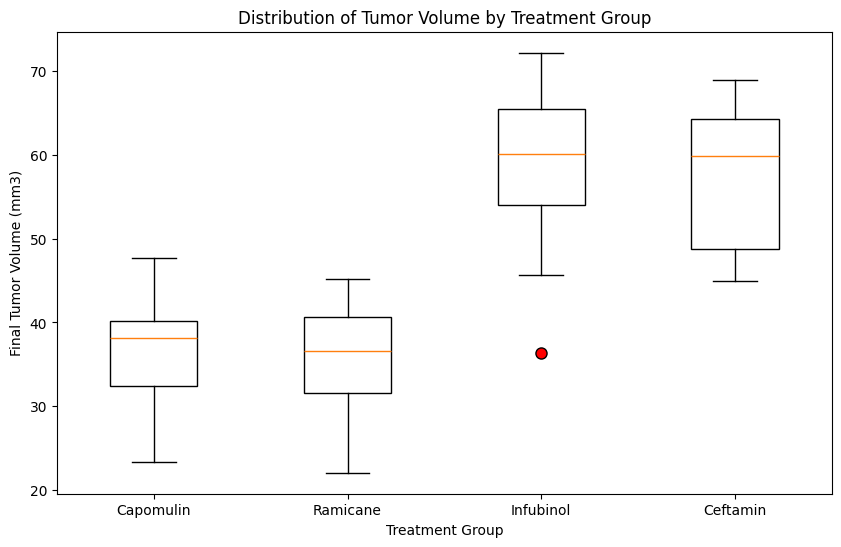

In [18]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.

plt.figure(figsize=(10, 6))
box = plt.boxplot(final_tumor_vol, labels=treatement_regimens, patch_artist=True,
                  showfliers=True, flierprops=dict(marker='o', markerfacecolor= 'red', markersize=8))

# Remove color from boxes
for b in box["boxes"]:
    b.set(facecolor="none")

# Create titles/labels
plt.title ("Distribution of Tumor Volume by Treatment Group")
plt.xlabel("Treatment Group")
plt.ylabel("Final Tumor Volume (mm3)")
plt.grid(False)
plt.show()

## Line and Scatter Plots

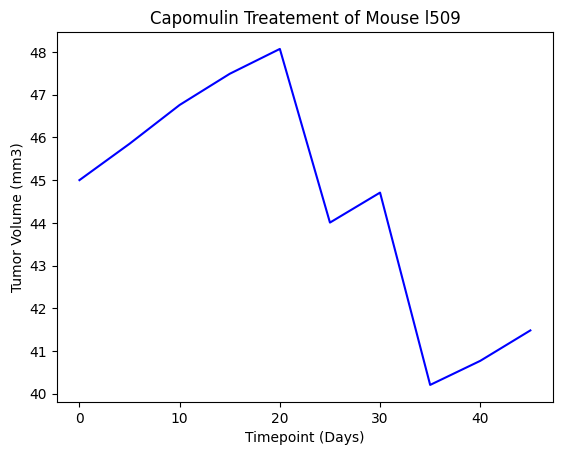

In [19]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Identify mouse ID
mouse_id = "l509"

# Filter data for Capomulin Regimen
capomulin_data = clean_data[clean_data["Drug Regimen"] == "Capomulin"]

# Filter data for single mouse
single_mouse_data = capomulin_data[capomulin_data["Mouse ID"] == mouse_id]

# Generate line plot
plt.plot(single_mouse_data["Timepoint"], single_mouse_data["Tumor Volume (mm3)"], color='b', label=f"Mouse {mouse_id}")
plt.title(f"Capomulin Treatement of Mouse l509")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

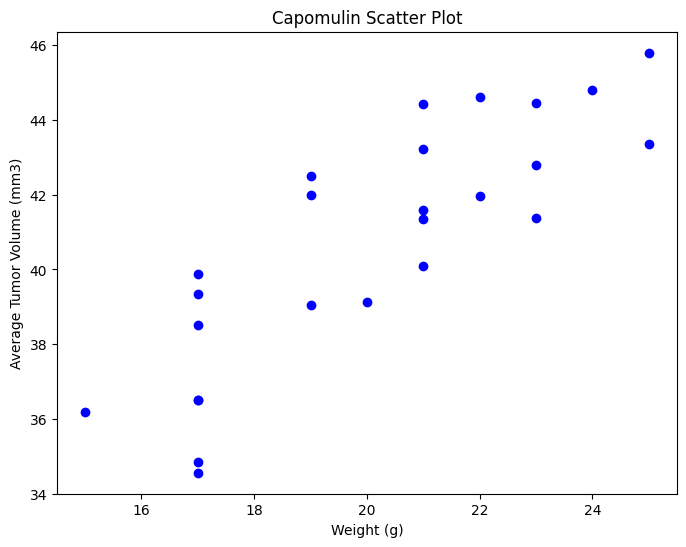

In [20]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Filter data
capomulin_scatter_data = clean_data[clean_data["Drug Regimen"] == "Capomulin"]
average_tumor_volume = capomulin_scatter_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouse_weight= capomulin_scatter_data.groupby("Mouse ID")["Weight (g)"].mean()

# Create plot
plt.figure(figsize=(8, 6))
plt.scatter(mouse_weight, average_tumor_volume, color='b', marker='o')
plt.title("Capomulin Scatter Plot")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is:  0.84


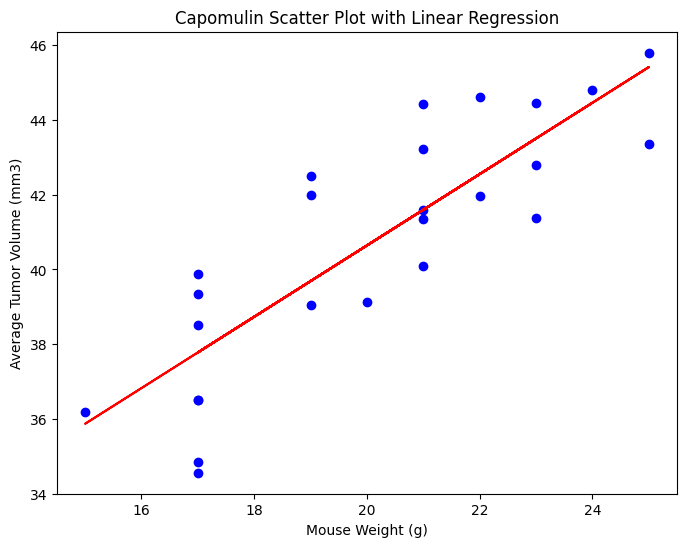

In [80]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

from scipy.stats import linregress


# Calculate correlation coefficient
correlation_coefficient = mouse_weight.corr(average_tumor_volume)

# Fit linear regression
slope, intercept, r_value, p_value, std_err = linregress(mouse_weight, average_tumor_volume)

print(f'The correlation between mouse weight and the average tumor volume is: {correlation_coefficient: .2f}')

# Generate the scatter plot with linear regression line
plt.figure(figsize=(8, 6))
plt.scatter(mouse_weight, average_tumor_volume, color= 'b', marker='o', label='Data Points')
plt.plot(mouse_weight, slope * mouse_weight + intercept, color = 'r', label="Linear Regression Line")
plt.title("Capomulin Scatter Plot with Linear Regression")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()